# IGL x INGENIO, July 2023 - Text pre-processing

This notebook introduces the series of pre-processing steps that we will routinely use during the rest of the week. If you feel like you could do with a Python crash course, please explore the Brushup notebook in the same folder. 



## Import libraries

In [1]:
# Basic libraries
import pandas as pd
pd.set_option('max_colwidth', 200)

import numpy as np
import os
from pathlib import Path
from tqdm import tqdm
tqdm.pandas()

# Libraries for plotting results
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from wordcloud import WordCloud

## Set path

In [2]:
# basedir = Path(os.environ['SUMMER_SCHOOL']) / 'TextPreprocessing'
basedir = Path(os.getcwd())
datadir = basedir / 'data'
utildir = basedir / 'utils'
os.chdir(basedir)

# Text pre-processing

It is easy to underestimate the importance of text pre-processing, dismissing it as a code routine that only shapes our text data in a way that we can feed it to downstream algorithms. However, the reality is that decisions that you make at this stage will greatly condition results that you get as you move down in your code. A priori knowledge on the data and well-defined goals are key in deciding the best route ahead in text pre-processing. For example, decisions about retaining or dropping digits, stemming or lemmatizing, including or excluding of certain stopwords as well as adding context-specific stopwords will all impact the amount of noise we observe in our data and the variation in text that is relevant for our analysis.

Motivation aside, let us use an example of text and gradually walk through the pre-processing steps.

In [3]:
text = 'An unkempt Kansas City disc jockey named Ray has appointed himself an altar boy at the exalted shrine of jazz, and his faith burns like a five-alarm fire. Embodied with respect and ferocity by Frank Boyd in “The Holler Sessions,” which runs through Friday at the Paradise Factory, Ray radiates a hard-core obsessiveness that’s both scary and contagious. You get the feeling that he wears sunglasses inside not to be cool, but because the light he’s seen is so bright. Part of P.S. 122’s Coil Festival 2016, “The Holler Sessions,” performed and written by Mr. Boyd in collaboration with the experimental theater group the TEAM (with Rachel Chavkin and Josh Aaseng as consulting directors), creates a convincing portrait of a monomaniac that, for all its flashiness, never blocks the view of the object of his passion. Yes, Ray, with his hyperkinetic delivery and sweaty sense of urgency, is a watch-me kind of guy. But what he really wants is for us to listen — not to him, but to the discs he spins from a slovenly broadcast room (designed and lighted by Eric Southern), where he subsists on gulps of coffee, whiskey, apples and peanuts. Ray, it seems, discovered jazz only a few years ago, and he’s outraged that he’s spent so much of his life without it. How could schools have taught him about the Nina, the Pinta and the Santa Maria, he asks in astonished anger, instead of the holy trinity of Duke, Bird and Billie. Like many a classic jazz D.J., he’s steeped in the arcana of recording session lore and biographical back stories. But he also retains the frothing enthusiasm of the newborn fanboy, and he tears into convulsive, obscenity-peppered rants that emulate the riffs of his favorite artists. Not that he thinks he could ever be on their level; as Ray points out many times, he is no musician himself. A faint cloud of pathos befogs Ray when he leaves his chair to shimmy to the beats of Coltrane, Davis, Armstrong and the Charleses Parker and Mingus (Matt Hubbs did the excellent sound design), or speaks almost longingly of the lethal self-destructiveness of many of his idols. (Ray has the jerky rhythms, the motor mouth and even the nosebleeds of a cokehead.) But when Ray sits back and lets the music wash over him, there’s dignity in his awe-struck stillness. His raptness makes us want to hear through his ears. And when the theater fades to black, as it does intermittently throughout the show, and we sit in the darkness with the music, sound becomes tactile, and even pop-station babies and longhairs are likely to feel like true believers in the gospel of Ray. This information was last updated on Aug. 27, 2018'
orig_text = text
print(text)

An unkempt Kansas City disc jockey named Ray has appointed himself an altar boy at the exalted shrine of jazz, and his faith burns like a five-alarm fire. Embodied with respect and ferocity by Frank Boyd in “The Holler Sessions,” which runs through Friday at the Paradise Factory, Ray radiates a hard-core obsessiveness that’s both scary and contagious. You get the feeling that he wears sunglasses inside not to be cool, but because the light he’s seen is so bright. Part of P.S. 122’s Coil Festival 2016, “The Holler Sessions,” performed and written by Mr. Boyd in collaboration with the experimental theater group the TEAM (with Rachel Chavkin and Josh Aaseng as consulting directors), creates a convincing portrait of a monomaniac that, for all its flashiness, never blocks the view of the object of his passion. Yes, Ray, with his hyperkinetic delivery and sweaty sense of urgency, is a watch-me kind of guy. But what he really wants is for us to listen — not to him, but to the discs he spins f

#### Tokenize
Note that, while we will be manually doing pre-processing for educational purposes, in practice nltk, gensim, and spacy all have pre-processing pipelines.

In [4]:
tokens = orig_text.split()
print(tokens)

['An', 'unkempt', 'Kansas', 'City', 'disc', 'jockey', 'named', 'Ray', 'has', 'appointed', 'himself', 'an', 'altar', 'boy', 'at', 'the', 'exalted', 'shrine', 'of', 'jazz,', 'and', 'his', 'faith', 'burns', 'like', 'a', 'five-alarm', 'fire.', 'Embodied', 'with', 'respect', 'and', 'ferocity', 'by', 'Frank', 'Boyd', 'in', '“The', 'Holler', 'Sessions,”', 'which', 'runs', 'through', 'Friday', 'at', 'the', 'Paradise', 'Factory,', 'Ray', 'radiates', 'a', 'hard-core', 'obsessiveness', 'that’s', 'both', 'scary', 'and', 'contagious.', 'You', 'get', 'the', 'feeling', 'that', 'he', 'wears', 'sunglasses', 'inside', 'not', 'to', 'be', 'cool,', 'but', 'because', 'the', 'light', 'he’s', 'seen', 'is', 'so', 'bright.', 'Part', 'of', 'P.S.', '122’s', 'Coil', 'Festival', '2016,', '“The', 'Holler', 'Sessions,”', 'performed', 'and', 'written', 'by', 'Mr.', 'Boyd', 'in', 'collaboration', 'with', 'the', 'experimental', 'theater', 'group', 'the', 'TEAM', '(with', 'Rachel', 'Chavkin', 'and', 'Josh', 'Aaseng', 'as

<br>
Tokenizing represents the most basic step in creating documents from raw data. Note however that not all tokens are equally relevant. As an example, we may not be interested in including '—' since the additional information it provides is unlikely to justify increasing the dimension of our document-term matrix. Similarly, certain words with signs, symbols and punctuation will not be considered identical to the same word without signs or symbols, and upper-case words will be distinct from lower-case words. In order to control for these, we will remove non-alphabetic elements, punctuation and convert our data to lower case.

In [5]:
import sys
from termcolor import colored, cprint

split_text = [i for j in text.split() for i in (j, ' ')]
col_text = [
    colored(x, 'blue') if x.isupper()
    else colored(x, 'red') if not x.isalpha()
    else x 
    for i in split_text for x in i
]

print(''.join(col_text))

An unkempt Kansas City disc jockey named Ray has appointed himself an altar boy at the exalted shrine of jazz, and his faith burns like a five-alarm fire. Embodied with respect and ferocity by Frank Boyd in “The Holler Sessions,” which runs through Friday at the Paradise Factory, Ray radiates a hard-core obsessiveness that’s both scary and contagious. You get the feeling that he wears sunglasses inside not to be cool, but because the light he’s seen is so bright. Part of P.S. 122’s Coil Festival 2016, “The Holler Sessions,” performed and written by Mr. Boyd in collaboration with the experimental theater group the TEAM (with Rachel Chavkin and Josh Aaseng as consulting directors), creates a convincing portrait of a monomaniac that, for all its flashiness, never blocks the view of the object of his passion. Yes, Ray, with his hyperkinetic delivery and sweaty sense of urgency, is a watch-me kind of guy. But what he really wants is for us to listen — not to him, but to the discs he spins f

#### Remove punctuation

In [6]:
text = text.lower()
print(text)

an unkempt kansas city disc jockey named ray has appointed himself an altar boy at the exalted shrine of jazz, and his faith burns like a five-alarm fire. embodied with respect and ferocity by frank boyd in “the holler sessions,” which runs through friday at the paradise factory, ray radiates a hard-core obsessiveness that’s both scary and contagious. you get the feeling that he wears sunglasses inside not to be cool, but because the light he’s seen is so bright. part of p.s. 122’s coil festival 2016, “the holler sessions,” performed and written by mr. boyd in collaboration with the experimental theater group the team (with rachel chavkin and josh aaseng as consulting directors), creates a convincing portrait of a monomaniac that, for all its flashiness, never blocks the view of the object of his passion. yes, ray, with his hyperkinetic delivery and sweaty sense of urgency, is a watch-me kind of guy. but what he really wants is for us to listen — not to him, but to the discs he spins f

In [7]:
remove_punct = str.maketrans('','','!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~“”’—')
text = text.translate(remove_punct) 
print(text)

an unkempt kansas city disc jockey named ray has appointed himself an altar boy at the exalted shrine of jazz and his faith burns like a fivealarm fire embodied with respect and ferocity by frank boyd in the holler sessions which runs through friday at the paradise factory ray radiates a hardcore obsessiveness thats both scary and contagious you get the feeling that he wears sunglasses inside not to be cool but because the light hes seen is so bright part of ps 122s coil festival 2016 the holler sessions performed and written by mr boyd in collaboration with the experimental theater group the team with rachel chavkin and josh aaseng as consulting directors creates a convincing portrait of a monomaniac that for all its flashiness never blocks the view of the object of his passion yes ray with his hyperkinetic delivery and sweaty sense of urgency is a watchme kind of guy but what he really wants is for us to listen  not to him but to the discs he spins from a slovenly broadcast room desi

<br>

The next step involves words themselves. One can argue that not all words are equally relevant, as some are recurrent and tied to grammar rather than them meaning of our text. These are known as **stopwords**, and include terms like _the, on, in, of, a_ etc. Several natural language processing libraries include different lists of stopwords. Let's look at <code>nltk</code>, and <code>gensim</code> versions of stopwords.

##### NLTK

In [8]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\David\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
nltk_stopwords = stopwords.words('english')
print('NLTK stopwords:',len(nltk_stopwords))
print(nltk_stopwords[:20])

NLTK stopwords: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


##### Gensim

In [10]:
import gensim
import gensim.corpora as corpora

In [11]:
gensim_sws = gensim.parsing.preprocessing.STOPWORDS
gensim_stopwords = list(gensim_sws)
print('GENSIM stopwords:',len(gensim_stopwords))
print(gensim_stopwords[:20])

GENSIM stopwords: 337
['part', 'was', 'seeming', 'anything', 'enough', 'thick', 'other', 'her', 'be', 'if', 'hereafter', 'without', 'fire', 'often', 'put', 'anyhow', 'third', 'myself', 'find', 'it']


In [12]:
stop_words = list(set(gensim_stopwords + nltk_stopwords)) #Concatenate the two stop word lists
print('Total stopwords:',len(stop_words))

Total stopwords: 390


In [13]:
split_text = [i for j in text.split() for i in (j, ' ')]
col_text = [
    colored(x, 'red') if x in stop_words
    else x 
    for x in split_text
]

print(''.join(col_text))

an unkempt kansas city disc jockey named ray has appointed himself an altar boy at the exalted shrine of jazz and his faith burns like a fivealarm fire embodied with respect and ferocity by frank boyd in the holler sessions which runs through friday at the paradise factory ray radiates a hardcore obsessiveness thats both scary and contagious you get the feeling that he wears sunglasses inside not to be cool but because the light hes seen is so bright part of ps 122s coil festival 2016 the holler sessions performed and written by mr boyd in collaboration with the experimental theater group the team with rachel chavkin and josh aaseng as consulting directors creates a convincing portrait of a monomaniac that for all its flashiness never blocks the view of the object of his passion yes ray with his hyperkinetic delivery and sweaty sense of urgency is a watchme kind of guy but what he really wants is for us to listen not to him but to the discs he spins from a slovenly broadcast room desig

In [14]:
col_text = [
    colored(x, 'white', 'on_white') if x in stop_words
    else x 
    for x in split_text
]

print(''.join(col_text))

an unkempt kansas city disc jockey named ray has appointed himself an altar boy at the exalted shrine of jazz and his faith burns like a fivealarm fire embodied with respect and ferocity by frank boyd in the holler sessions which runs through friday at the paradise factory ray radiates a hardcore obsessiveness thats both scary and contagious you get the feeling that he wears sunglasses inside not to be cool but because the light hes seen is so bright part of ps 122s coil festival 2016 the holler sessions performed and written by mr boyd in collaboration with the experimental theater group the team with rachel chavkin and josh aaseng as consulting directors creates a convincing portrait of a monomaniac that for all its flashiness never blocks the view of the object of his passion yes ray with his hyperkinetic delivery and sweaty sense of urgency is a watchme kind of guy but what he really wants is for us to listen not to him but to the discs he spins from a slovenly broadcast room desig

In [15]:
text = [x for x in text.split() if x not in stop_words] 
print(text)

['unkempt', 'kansas', 'city', 'disc', 'jockey', 'named', 'ray', 'appointed', 'altar', 'boy', 'exalted', 'shrine', 'jazz', 'faith', 'burns', 'like', 'fivealarm', 'embodied', 'respect', 'ferocity', 'frank', 'boyd', 'holler', 'sessions', 'runs', 'friday', 'paradise', 'factory', 'ray', 'radiates', 'hardcore', 'obsessiveness', 'thats', 'scary', 'contagious', 'feeling', 'wears', 'sunglasses', 'inside', 'cool', 'light', 'hes', 'seen', 'bright', 'ps', '122s', 'coil', 'festival', '2016', 'holler', 'sessions', 'performed', 'written', 'mr', 'boyd', 'collaboration', 'experimental', 'theater', 'group', 'team', 'rachel', 'chavkin', 'josh', 'aaseng', 'consulting', 'directors', 'creates', 'convincing', 'portrait', 'monomaniac', 'flashiness', 'blocks', 'view', 'object', 'passion', 'yes', 'ray', 'hyperkinetic', 'delivery', 'sweaty', 'sense', 'urgency', 'watchme', 'kind', 'guy', 'wants', 'listen', 'discs', 'spins', 'slovenly', 'broadcast', 'room', 'designed', 'lighted', 'eric', 'southern', 'subsists', 'g

<br>

The decision to remove or transform digits will vary from application to application. Here, we will remove them.

In [16]:
col_text = [
    colored(x, 'red') if x.isdigit()
    else x 
    for i in split_text for x in i
]

print(''.join(col_text))

an unkempt kansas city disc jockey named ray has appointed himself an altar boy at the exalted shrine of jazz and his faith burns like a fivealarm fire embodied with respect and ferocity by frank boyd in the holler sessions which runs through friday at the paradise factory ray radiates a hardcore obsessiveness thats both scary and contagious you get the feeling that he wears sunglasses inside not to be cool but because the light hes seen is so bright part of ps 122s coil festival 2016 the holler sessions performed and written by mr boyd in collaboration with the experimental theater group the team with rachel chavkin and josh aaseng as consulting directors creates a convincing portrait of a monomaniac that for all its flashiness never blocks the view of the object of his passion yes ray with his hyperkinetic delivery and sweaty sense of urgency is a watchme kind of guy but what he really wants is for us to listen not to him but to the discs he spins from a slovenly broadcast room desig

In [17]:
split_text = [i for j in ' '.join(text).split() for i in (j, ' ')]
col_text = [x for i in split_text for x in i if not x.isdigit()]

text = ''.join(col_text).split()

print(text)

['unkempt', 'kansas', 'city', 'disc', 'jockey', 'named', 'ray', 'appointed', 'altar', 'boy', 'exalted', 'shrine', 'jazz', 'faith', 'burns', 'like', 'fivealarm', 'embodied', 'respect', 'ferocity', 'frank', 'boyd', 'holler', 'sessions', 'runs', 'friday', 'paradise', 'factory', 'ray', 'radiates', 'hardcore', 'obsessiveness', 'thats', 'scary', 'contagious', 'feeling', 'wears', 'sunglasses', 'inside', 'cool', 'light', 'hes', 'seen', 'bright', 'ps', 's', 'coil', 'festival', 'holler', 'sessions', 'performed', 'written', 'mr', 'boyd', 'collaboration', 'experimental', 'theater', 'group', 'team', 'rachel', 'chavkin', 'josh', 'aaseng', 'consulting', 'directors', 'creates', 'convincing', 'portrait', 'monomaniac', 'flashiness', 'blocks', 'view', 'object', 'passion', 'yes', 'ray', 'hyperkinetic', 'delivery', 'sweaty', 'sense', 'urgency', 'watchme', 'kind', 'guy', 'wants', 'listen', 'discs', 'spins', 'slovenly', 'broadcast', 'room', 'designed', 'lighted', 'eric', 'southern', 'subsists', 'gulps', 'cof

In [18]:
from collections import Counter
freqs = Counter(text) # Bag of Words representation for the first court case
freqs.most_common()[:10]

[('ray', 9),
 ('hes', 4),
 ('jazz', 3),
 ('like', 3),
 ('boyd', 2),
 ('holler', 2),
 ('sessions', 2),
 ('theater', 2),
 ('sound', 2),
 ('music', 2)]

#### Stems, lemmas

We may also be interested in further reducing dimensionality by reducing words to their common linguistic root. In order to do so, we can either _stem_ or _lemmatize_ words. Stemming is a relatively crude method for cataloging related words; it essentially removes letters from the end until the stem is reached.

In [19]:
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer('english') # Stemming words using NLTK utility SnowballStemmer, or Porter2
tokens_stemmed = [stemmer.stem(t) for t in text]
print(tokens_stemmed)

['unkempt', 'kansa', 'citi', 'disc', 'jockey', 'name', 'ray', 'appoint', 'altar', 'boy', 'exalt', 'shrine', 'jazz', 'faith', 'burn', 'like', 'fivealarm', 'embodi', 'respect', 'feroc', 'frank', 'boyd', 'holler', 'session', 'run', 'friday', 'paradis', 'factori', 'ray', 'radiat', 'hardcor', 'obsess', 'that', 'scari', 'contagi', 'feel', 'wear', 'sunglass', 'insid', 'cool', 'light', 'hes', 'seen', 'bright', 'ps', 's', 'coil', 'festiv', 'holler', 'session', 'perform', 'written', 'mr', 'boyd', 'collabor', 'experiment', 'theater', 'group', 'team', 'rachel', 'chavkin', 'josh', 'aaseng', 'consult', 'director', 'creat', 'convinc', 'portrait', 'monomaniac', 'flashi', 'block', 'view', 'object', 'passion', 'yes', 'ray', 'hyperkinet', 'deliveri', 'sweati', 'sens', 'urgenc', 'watchm', 'kind', 'guy', 'want', 'listen', 'disc', 'spin', 'sloven', 'broadcast', 'room', 'design', 'light', 'eric', 'southern', 'subsist', 'gulp', 'coffe', 'whiskey', 'appl', 'peanut', 'ray', 'discov', 'jazz', 'year', 'ago', 'hes

<br>Unfortunately, English has many exceptions where a more sophisticated method is required. In contrast to stemming, lemmatization looks beyond word reduction and considers a language's full vocabulary to apply a morphological analysis to words. The lemma of _'was'_ is _'be'_ and the lemma of _'mice'_ is _'mouse'_. For information of spacy's model, check [here](https://spacy.io/models/en).

In [20]:
!python -m spacy download en_core_web_sm

     --------------------------------------- 12.8/12.8 MB 18.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [21]:
import spacy
import en_core_web_sm
nlp = spacy.load('en_core_web_sm')

def show_lemmas(_text):
    for token in _text:
        print(f'{token.text:{20}} {token.pos_:{6}} {token.lemma:<{22}} {token.lemma_}')
        
text_nlp = nlp(' '.join(text) + ' mice and mouse')
show_lemmas(text_nlp[-20:])

darkness             NOUN   5523010817707517989    darkness
music                NOUN   13617878141848112644   music
sound                NOUN   1289836513871212815    sound
tactile              ADP    5132190181732026497    tactile
popstation           NOUN   3766186773784785210    popstation
babies               NOUN   11006452741498633892   baby
longhairs            NOUN   2654126123548375628    longhair
likely               ADV    6740298879949941214    likely
feel                 VERB   5741770584995928333    feel
like                 SCONJ  18194338103975822726   like
true                 ADJ    7434368892455186804    true
believers            NOUN   3634892748516982575    believer
gospel               NOUN   2006039062016309023    gospel
ray                  NOUN   11428735203161385371   ray
information          NOUN   5552516367584430480    information
updated              VERB   1936357517718432020    update
aug                  PROPN  17562083453191728838   aug
mice          

# Parsing

In [22]:
from spacy import displacy
text_parse = nlp(orig_text)

In [23]:
displacy.render(text_parse, style="dep", jupyter=True)

In [24]:
for sent in text_parse.sents:
    print("sentence:", sent)
    print("root:", sent.root)
    print([(w, w.dep_) for w in sent.root.children])
    print()

sentence: An unkempt Kansas City disc jockey named Ray has appointed himself an altar boy at the exalted shrine of jazz, and his faith burns like a five-alarm fire.
root: appointed
[(jockey, 'nsubj'), (has, 'aux'), (himself, 'dobj'), (boy, 'dobj'), (at, 'prep'), (,, 'punct'), (and, 'cc'), (burns, 'conj')]

sentence: Embodied with respect and ferocity by Frank Boyd in “The Holler Sessions,” which runs through Friday at the Paradise Factory, Ray radiates a hard-core obsessiveness that’s both scary and contagious.
root: radiates
[(Embodied, 'advcl'), (,, 'punct'), (Ray, 'nsubj'), (obsessiveness, 'dobj'), (., 'punct')]

sentence: You get the feeling that he wears sunglasses inside not to be cool, but because the light he’s seen is so bright.
root: get
[(You, 'nsubj'), (feeling, 'dobj'), (,, 'punct'), (but, 'cc'), (is, 'conj'), (., 'punct')]

sentence: Part of P.S. 122’s Coil Festival 2016, “The Holler Sessions,” performed and written by Mr. Boyd in collaboration with the experimental theat

## Document-term matrix

The exercise above serves to ilustrate some of the steps that a researcher may use to reduce the dimensionality and noise in the data. The next step is to transform our corpus on a matrix with $D$ rows and $V$ columns. This representation largely ignores interdependence between words and context, but provides a tractable form for most econometric applications.

In [25]:
news_lite = pd.read_csv(datadir / 'news_lite.csv', usecols=['article'])

news_lite['article'] = news_lite['article'].astype('str')

In [26]:
news_lite.article.head()

0    CAPE TOWN (Reuters) - South African FIFA presidential candidate Tokyo Sexwale said on Monday he is a realist who is “open to negotiations and alliances” ahead of Friday’s vote in Zurich. Sexwale, ...
1    TOKYO, May 21 (Reuters) - Japanese government bond prices were flat on Tuesday, with a regular debt-buying operation by the central bank helping offset negative pressure from a retreat by U.S. Tre...
2         MOSCOW (Reuters) - A total of 48,000 of Russian troops have taken part in Moscow’s military campaign in Syria, Russian Defence Minister Sergei Shoigu said on Friday. Reporting by Dmitry Solovyov
3    Georgetown University, J.D.\nGeorgetown University, B.A. \n\nAdministration \n        —\n            08/13/19 12:10 PM EDT\n\n \n\nNational Security \n        —\n            08/12/19 12:19 PM EDT\...
4    Aug 16 (Reuters) - Tecan Group AG: * TECAN ACCELERATES BROAD GENOMICS STRATEGY WITH THE ACQUISITION OF NUGEN TECHNOLOGIES * CLOSING OF TRANSACTION EXPECTED WITHIN COMING WEEKS

In [27]:
# Pre-processing steps
remove_punct = str.maketrans('','','!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~“”’')
stop_words = stopwords.words('english')
stop_words.append('hes')
stemmer = SnowballStemmer('english')

In [28]:
# Pre-processing function
def normalize_text(doc):
    """Takes documents as input and outputs clean tokens"""
    
    lower      = doc.lower()                                             # all lower case
    nopunc     = lower.translate(remove_punct)                           # remove punctuation
    words      = nopunc.split()                                          # split into tokens
    nostop     = [w for w in words if w not in stop_words]               # remove stopwords
    no_numbers = [w if not w.isdigit() else '' for w in nostop]         # normalize numbers
    stem_text  = [stemmer.stem(w) for w in no_numbers]                   # stem each word
    
    
    return ' '.join(stem_text)

In [29]:
news_lite['preproc'] = news_lite.article.progress_apply(lambda row: normalize_text(row))

  9%|▉         | 57/633 [00:00<00:10, 56.76it/s]

100%|██████████| 633/633 [00:07<00:00, 83.71it/s] 


In [30]:
news_lite.preproc.head()

0    cape town reuter south african fifa presidenti candid tokyo sexwal said monday realist open negoti allianc ahead friday vote zurich sexwal whose campaign fail gain traction first candid process su...
1    tokyo may  reuter japanes govern bond price flat tuesday regular debtbuy oper central bank help offset negat pressur retreat us treasuri twoyear yield 10year yield unchang minus  minus  respect 30...
2                                                        moscow reuter total  russian troop taken part moscow militari campaign syria russian defenc minist sergei shoigu said friday report dmitri solovyov
3    georgetown univers jd georgetown univers ba administr —   pm edt nation secur —   pm edt nation secur —   edt white hous —   pm edt court battl —   pm edt congress blog —   pm edt administr —   pm...
4                             aug  reuter tecan group ag tecan acceler broad genom strategi acquisit nugen technolog close transact expect within come week sourc text eikon compani

<br>
While the matrix can be built manually, scikit-learn is well-known for having off-the-shelve features for most day-to-day Machine Learning applications. In this instance, we will use <code>CountVectorizer</code>, which creates a matrix of count frequencies from a corpus of data. 

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(max_features=20)

X = vec.fit_transform(news_lite['preproc']).todense()
words = vec.get_feature_names_out()
x_df = pd.DataFrame(X)
x_df.columns = words
x_df

,also,compani,could,get,go,like,new,one,peopl,percent,presid,report,said,say,state,time,trump,us,would,year
0,0,0,1,0,0,0,0,0,0,0,2,0,1,0,1,0,0,0,0,1
1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,2,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2,0,1
629,1,0,0,0,0,0,2,0,1,16,0,2,1,0,1,2,0,7,0,2
630,1,4,1,0,1,0,1,0,0,0,0,1,3,0,0,0,0,3,0,3
631,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,2


<br>Note that some applications go beyond the use of unigrams to perform text analysis. CountVectorizer can easily adapt counts for terms that may either be unigrams (one word) or several words (bigrams, trigrams).

In [32]:
vec = CountVectorizer(
    min_df=1e-2,
    max_df=.8,  
    max_features=500,
    ngram_range=(1,3)
)

X = vec.fit_transform(news_lite['preproc']).todense()
words = vec.get_feature_names_out()
x_df = pd.DataFrame(X)
x_df.columns = words

<br> A direct improvement over a matrix of counts is to weight them according to their inverse document frequency. The reasoning behind it is that words that are significative for most applications are those that appear rarely in documents (**idf**) but that are very frequent in the documents in which they do appear (**tf**). We can use scikit-learn's [TfIdfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) for the task at hand.

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(
    min_df=1e-2,
    max_df=.8,  
    max_features=1000,
    ngram_range=(1,3)
)

X = vec.fit_transform(news_lite['preproc'])
X_mat = X.todense()
words = vec.get_feature_names_out()
x_df = pd.DataFrame(X_mat)
x_df.columns = words
x_df

,2019,2019 capitol,2019 capitol hill,abl,accept,access,accord,account,accus,across,...,year,year ago,yen,yet,yield,york,york time,young,your,yuan
0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.076753,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.310528,0.000000,0.556124,0.000000,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.062783,0.062783,0.062783,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.073952,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
629,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.033637,...,0.037662,0.0,0.310669,0.034159,0.139094,0.032314,0.0,0.0,0.0,0.0
630,0.000000,0.000000,0.000000,0.0,0.070521,0.000000,0.045193,0.0,0.0,0.111801,...,0.093886,0.0,0.000000,0.000000,0.000000,0.053702,0.0,0.0,0.0,0.0
631,0.000000,0.000000,0.000000,0.0,0.000000,0.108395,0.000000,0.0,0.0,0.000000,...,0.106045,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [34]:
x_df.mean().sort_values(ascending=True)[:20]

en           0.001198
bush         0.001579
elizabeth    0.001660
sex          0.001825
guy          0.002122
safe         0.002274
what         0.002348
make sure    0.002371
jone         0.002470
la           0.002484
here         0.002512
sometim      0.002559
someon       0.002592
sit          0.002648
cannot       0.002663
los          0.002720
safeti       0.002742
eye          0.002766
attent       0.002802
everyon      0.002803
dtype: float64

### BoW applications

#### Search engine

In [35]:
from sklearn.metrics.pairwise import cosine_similarity

def search_engine(tfidf, _text, top_return=1):
    '''
    Returns closest match/es in news repository.
    '''
    text_ = tfidf.transform([normalize_text(_text)])
    cos_sim = cosine_similarity(text_, X).flatten()
    top_ = np.argsort(cos_sim)[::-1][:top_return]
    response = news_lite.iloc[top_]
    
    return response, top_

In [36]:
articles, idx = search_engine(
    tfidf=vec,
    _text='court case',
    top_return=10
)

print(articles.article)

546    STOCKHOLM, Sept 16 (Reuters) - A Swedish appeals court decided to uphold the arrest warrant for Wikileaks founder Julian Assange on Friday, prolonging the six year long legal stand off between pro...
280    Obama's Supreme Court pick returned to his job Wednesday as the chief judge of the DC circuit appeals court. It had been 11 months, per the AP. This marks the end of a hard battle against Senate R...
208    Washington  (CNN)A federal appeals court on Wednesday granted a Trump administration request to expedite oral arguments in a case challenging the legality of the Affordable Care Act.   The new tim...
376    Washington (CNN)The Senate Judiciary Committee on Thursday advanced a slate of judicial nominees to the floor for a vote, including Jonathan Kobes to be a US Circuit Judge for the Eighth Circuit, ...
424    A federal appeals court has revived a retaliation lawsuit by the ex-president of a Massachusetts outfit that helps hospitals provide specialty pharmacy services who 

#### Plagiarism


In [37]:
from sklearn.metrics.pairwise import linear_kernel

def sim_detection(tfidf_mat, idx, top_return=1):
    '''
    Detects similar documents in corpus.
    '''
    text_ = linear_kernel(tfidf_mat[idx], tfidf_mat).flatten()
    top_ = np.argsort(text_)[::-1][1:top_return+1]
    response = news_lite.iloc[top_]
    
    return response, top_

In [38]:
news_lite.article[1]

'TOKYO, May 21 (Reuters) - Japanese government bond prices were flat on Tuesday, with a regular debt-buying operation by the central bank helping offset negative pressure from a retreat by U.S. Treasuries. The two-year yield and the 10-year yield were unchanged at minus 0.160% and minus 0.050%, respectively. The 30-year yield was also flat, at 0.540%. The Bank of Japan on Tuesday offered to buy 1.23 trillion yen ($11.16 billion) of one- to 10-year JGBs as part of a regular operation. The Nikkei was little changed and unable to provide the JGB market with incentives. U.S. Treasury prices fell and their yields rose on Monday after Federal Reserve officials expressed confidence in the world’s largest economy. ($1 = 110.2200 yen) (Reporting by the Tokyo markets team; editing by Rashmi Aich)'

In [39]:
close_matches, _ = sim_detection(
    tfidf_mat=X,
    idx=1,
    top_return=5
)

print(close_matches.article)

365    * MSCI Asia ex-Japan +0.31%; Nikkei +0.39% * Analysts see widespread uncertainty, continued risk aversion * Brent crude wavers around $70 per barrel * Asian stock markets: https://tmsnrt.rs/2zpUAr...
455    (The opinions expressed here are those of the author, a columnist for Reuters.) By Jamie McGeever LONDON, Jan 3 (Reuters) - The onset of world financial market stress is usually heralded by the ri...
586    U.S. government debt yields followed European rates lower Wednesday after new data suggested a gloomier economic outlook amid German business leaders. Bond yields around the world dipped after the...
629    * Shares around the world rattled by Apple revenue warning * Wall Street further hurt by weak U.S. factory data * Yen soars against dollar; Treasuries, gold rise (Updates to late afternoon in U.S....
366    * U.S. Retail sales data tops expectations * German investor morale survey worse-than-expected * Mounting no-deal Brexit worries knock pound (Updates with open of U.

### Document clusters

In [40]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 5, random_state=42).fit(X)
centers = kmeans.cluster_centers_.argsort()[:,:len(x_df.columns)-51:-1]

c:\Users\David\miniconda3\envs\software_crawler\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [41]:
from sklearn.manifold import TSNE

tsne_model = TSNE(
    n_components=2,
    verbose=1,
    random_state=42,
    angle=.99, 
    init='pca'
 )

tsne = tsne_model.fit_transform(x_df.iloc[:,centers.flatten()].T)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 250 samples in 0.004s...


[t-SNE] Computed neighbors for 250 samples in 0.224s...
[t-SNE] Computed conditional probabilities for sample 250 / 250
[t-SNE] Mean sigma: 0.302742
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.826828
[t-SNE] KL divergence after 1000 iterations: -0.117676


In [42]:
import matplotlib.colors as mcolors

colors = [color for _, color in list(mcolors.CSS4_COLORS.items())[10:15]]

clust= [
    0 if i in centers[0] 
    else 1 if i in centers[1] 
    else 2 if i in centers[2] 
    else 3 if i in centers[3] 
    else 4 if i in centers[4] 
    else i 
    for i in centers.flatten()
]

colors = [colors[i] for i in clust]

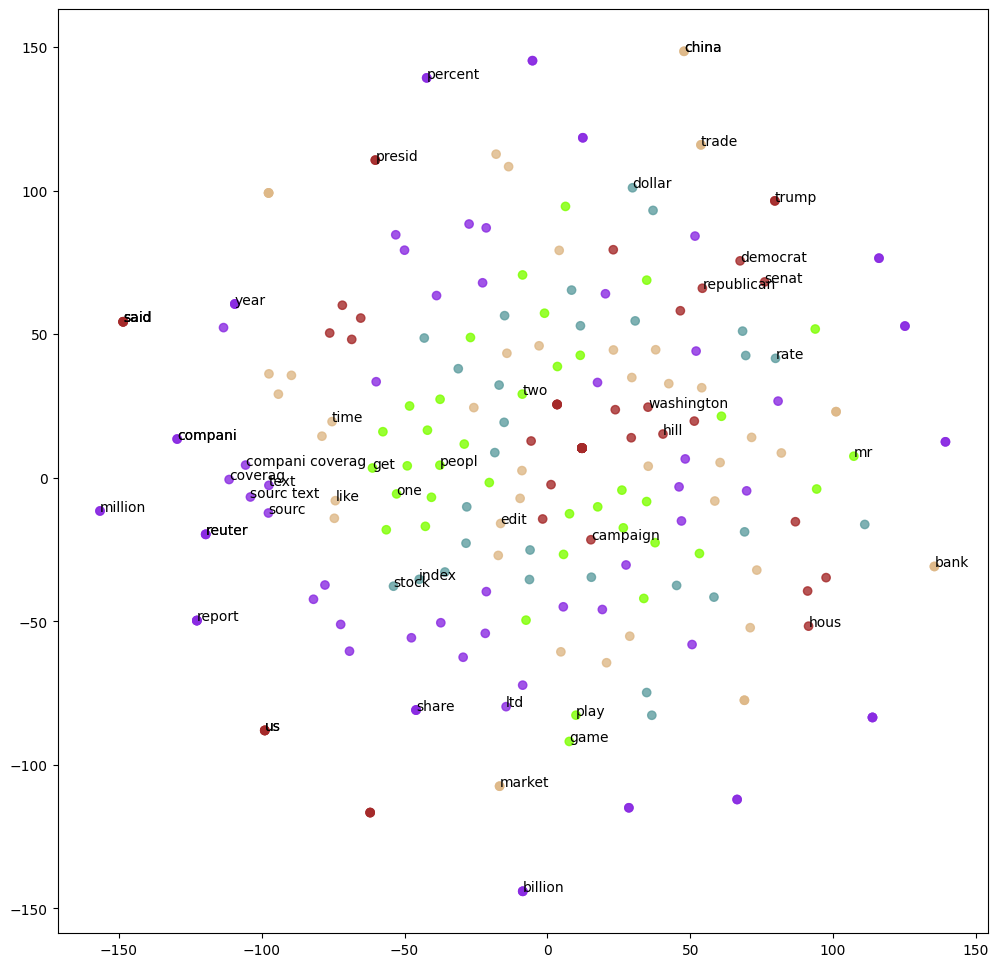

In [43]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1, 1, 1)

ax.scatter(tsne[:, 0], tsne[:, 1], alpha=0.8, color=colors)

for i, pos in enumerate(tsne):
    if i % 50 < 10:
        ax.annotate(words[centers.flatten()[i]], pos)

### [Lexical diversity](https://pypi.org/project/lexical-diversity/)

It's your turn to make something out of the data above. In class you've seen measures of lexican diversity, and python has ready-to-use packages that perform just that. Take this as an opportunity to take stock on what we've seen so far, as well as familiarize yourself with python utilities.

### [Readability metrics](https://pypi.org/project/py-readability-metrics/)